### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, MaxNLocator

### Settings

In [2]:
%matplotlib inline

pd.set_option('display.max_rows', None)
sns.set_style('whitegrid', {'grid.color': '0.5'})

### Import data

In [3]:
%store -r sc_dataframes_cleaned

In [4]:
sc_dataframes_cleaned.keys()

dict_keys(['sc_dim_customer', 'sc_dim_market', 'sc_dim_product', 'sc_fact_forecast_monthly', 'sc_fact_sales_monthly', 'sc_freight_cost', 'sc_gross_price', 'sc_manufacturing_cost', 'sc_post_invoice_deductions_18_20', 'sc_post_invoice_deductions_21_22', 'sc_pre_invoice_deductions'])

In [5]:
# Create copies of each dataframe
sc_dim_customer = sc_dataframes_cleaned['sc_dim_customer'].copy()
sc_dim_market = sc_dataframes_cleaned['sc_dim_market'].copy()
sc_dim_product = sc_dataframes_cleaned['sc_dim_product'].copy()
sc_fact_forecast_monthly = sc_dataframes_cleaned['sc_fact_forecast_monthly'].copy()
sc_fact_sales_monthly = sc_dataframes_cleaned['sc_fact_sales_monthly'].copy()
sc_freight_cost = sc_dataframes_cleaned['sc_freight_cost'].copy()
sc_gross_price = sc_dataframes_cleaned['sc_gross_price'].copy()
sc_manufacturing_cost = sc_dataframes_cleaned['sc_manufacturing_cost'].copy()
sc_post_invoice_deductions_18_20 = sc_dataframes_cleaned['sc_post_invoice_deductions_18_20'].copy()
sc_post_invoice_deductions_21_22 = sc_dataframes_cleaned['sc_post_invoice_deductions_21_22'].copy()
sc_pre_invoice_deductions = sc_dataframes_cleaned['sc_pre_invoice_deductions'].copy()

### Analysis

In [6]:
# Get all column names to input into large language model

# Initialize an empty set to store unique column names
all_column_names = set()

# Iterate over each key-value pair in the dictionary and get the column names of the current DataFrame and add them to the set
for df_name, df in sc_dataframes_cleaned.items():
    all_column_names.update(df.columns)
    
# List all column names
list(all_column_names)

['product_code',
 'fiscal_year',
 'gross_sales',
 'region',
 'product',
 'pre_invoice_discount_pct',
 'customer',
 'sold_quantity',
 'segment',
 'cost_of_goods',
 'discounts_pct',
 'market',
 'gross_price',
 'net_sales',
 'platform',
 'cost_year',
 'other_cost_pct',
 'sub_zone',
 'forecast_quantity',
 'freight_pct',
 'manufacturing_cost',
 'date',
 'category',
 'customer_code',
 'other_deductions_pct',
 'gross_margin_pct',
 'division',
 'net_invoice_sales',
 'net_profit',
 'channel',
 'variant']

In [7]:
sc_dim_customer.head(5)

,customer_code,customer,market,platform,channel
0,90002012,Electricalsocity,India,Brick & Mortar,Retailer
1,90002013,Electricalslytical,India,Brick & Mortar,Retailer
2,90002010,Ebay,India,E-Commerce,Retailer
3,90002011,Atliq Exclusive,India,Brick & Mortar,Retailer
4,90002014,Expression,India,Brick & Mortar,Retailer


In [8]:
sc_dim_market.head(5)

,market,sub_zone,region
0,China,ROA,APAC
1,India,India,APAC
2,Indonesia,ROA,APAC
3,Japan,ROA,APAC
4,Pakistan,ROA,APAC


In [9]:
sc_dim_product.head(5)

,product_code,product,division,segment,category,variant
0,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
1,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Plus
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Premium
3,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Premium Plus
4,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,P & A,Peripherals,Internal HDD,Standard


In [10]:
sc_fact_forecast_monthly.head(5)

,date,fiscal_year,product_code,customer_code,forecast_quantity
0,2017-09-01,2018,A6218160101,70008169,146
1,2017-09-01,2018,A6218160101,90008165,120
2,2017-09-01,2018,A6218160101,90008166,216
3,2017-09-01,2018,A6218160101,90008167,141
4,2017-09-01,2018,A6218160101,70008170,85


In [11]:
sc_fact_sales_monthly.head(5)

,date,fiscal_year,product_code,customer_code,sold_quantity,gross_sales,net_invoice_sales,net_sales,cost_of_goods,gross_margin_pct,net_profit
0,2017-09-01,2018,A6218160101,70008169,81,1069.2729,967.319139,673.989914,340.676395,49.453784,333.313519
1,2017-09-01,2018,A6218160101,90008165,157,2072.5413,1482.119149,870.389878,660.323383,24.134759,210.066495
2,2017-09-01,2018,A6218160101,90008166,126,1663.3134,1183.649231,647.680403,529.941059,18.178618,117.739344
3,2017-09-01,2018,A6218160101,90008167,160,2112.1440,1700.914928,996.808779,672.941027,32.490459,323.867752
4,2017-09-01,2018,A6218160101,70008170,120,1584.1080,1283.693887,789.431187,504.705770,36.067161,284.725417


In [12]:
sc_freight_cost.head(5)

,market,fiscal_year,freight_pct,other_cost_pct
0,Australia,2018,0.0188,0.0050
1,Austria,2018,0.0272,0.0053
2,Bangladesh,2018,0.0219,0.0058
3,Brazil,2018,0.0239,0.0033
4,Canada,2018,0.0264,0.0054


In [13]:
sc_gross_price.head(5)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [14]:
sc_manufacturing_cost.head(5)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [15]:
sc_post_invoice_deductions_18_20.head(5)

,date,fiscal_year,customer_code,product_code,discounts_pct,other_deductions_pct
0,2017-09-01,2018,70002017,A0118150101,0.265957,0.071871
1,2017-10-01,2018,70002017,A0118150101,0.308992,0.097627
2,2017-11-01,2018,70002017,A0118150101,0.331268,0.075211
3,2018-01-01,2018,70002017,A0118150101,0.295792,0.072036
4,2018-02-01,2018,70002017,A0118150101,0.320787,0.079335


In [16]:
sc_post_invoice_deductions_21_22.head(5)

,date,fiscal_year,customer_code,product_code,discounts_pct,other_deductions_pct
0,2021-01-01,2021,70002017,A0118150101,0.265561,0.135387
1,2021-02-01,2021,70002017,A0118150101,0.231823,0.125004
2,2021-03-01,2021,70002017,A0118150101,0.265881,0.140936
3,2021-05-01,2021,70002017,A0118150101,0.245106,0.138077
4,2021-06-01,2021,70002017,A0118150101,0.253668,0.130621


In [17]:
sc_pre_invoice_deductions.head(5)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.082442
1,70002017,2019,0.077659
2,70002017,2020,0.073458
3,70002017,2021,0.070269
4,70002017,2022,0.105678


# Request 1
## Can you identify the top three product categories by gross revenue for each fiscal year?
## Can you identify the top three product categories by net profit for each fiscal year?

In [18]:
sc_fact_sales_monthly.head(5)

,date,fiscal_year,product_code,customer_code,sold_quantity,gross_sales,net_invoice_sales,net_sales,cost_of_goods,gross_margin_pct,net_profit
0,2017-09-01,2018,A6218160101,70008169,81,1069.2729,967.319139,673.989914,340.676395,49.453784,333.313519
1,2017-09-01,2018,A6218160101,90008165,157,2072.5413,1482.119149,870.389878,660.323383,24.134759,210.066495
2,2017-09-01,2018,A6218160101,90008166,126,1663.3134,1183.649231,647.680403,529.941059,18.178618,117.739344
3,2017-09-01,2018,A6218160101,90008167,160,2112.1440,1700.914928,996.808779,672.941027,32.490459,323.867752
4,2017-09-01,2018,A6218160101,70008170,120,1584.1080,1283.693887,789.431187,504.705770,36.067161,284.725417


In [19]:
sc_dim_product.head(5)

,product_code,product,division,segment,category,variant
0,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
1,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Plus
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Premium
3,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Premium Plus
4,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,P & A,Peripherals,Internal HDD,Standard


In [20]:
# Merge necessary tables
merge = pd.merge(sc_fact_sales_monthly, sc_dim_product, how='left', on='product_code')
merge.head(5)

,date,fiscal_year,product_code,customer_code,sold_quantity,gross_sales,net_invoice_sales,net_sales,cost_of_goods,gross_margin_pct,net_profit,product,division,segment,category,variant
0,2017-09-01,2018,A6218160101,70008169,81,1069.2729,967.319139,673.989914,340.676395,49.453784,333.313519,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
1,2017-09-01,2018,A6218160101,90008165,157,2072.5413,1482.119149,870.389878,660.323383,24.134759,210.066495,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
2,2017-09-01,2018,A6218160101,90008166,126,1663.3134,1183.649231,647.680403,529.941059,18.178618,117.739344,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
3,2017-09-01,2018,A6218160101,90008167,160,2112.1440,1700.914928,996.808779,672.941027,32.490459,323.867752,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
4,2017-09-01,2018,A6218160101,70008170,120,1584.1080,1283.693887,789.431187,504.705770,36.067161,284.725417,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard


In [21]:
# Gross Revenue

# Group by fiscal_year and product category
gross_revenue_fiscal_year = merge.groupby(['fiscal_year', 'category'])['gross_sales'].sum().reset_index().rename(columns={'gross_sales':'gross_sales_millions'})

# Round to get rid of scientific notation
gross_revenue_fiscal_year['gross_sales_millions'] = (gross_revenue_fiscal_year['gross_sales_millions'] / 1000000).round(4)

gross_revenue_fiscal_year.head(5)

,fiscal_year,category,gross_sales_millions
0,2018,Batteries,0.0000
1,2018,Business Laptop,7.8633
2,2018,External Solid State Drives,3.7766
3,2018,Gaming Laptop,0.5389
4,2018,Graphic Card,1.9779


In [22]:
# Find top 3 categories for each fiscal year
top_categories = gross_revenue_fiscal_year.groupby('fiscal_year').apply(lambda x: x.nlargest(3, 'gross_sales_millions')).reset_index(drop=True)

# Add rank column
top_categories['rank'] = (top_categories.groupby('fiscal_year')['gross_sales_millions'].rank(ascending=False, method='dense')).astype('int8')

# Reoganize columns
top_categories = top_categories[['fiscal_year', 'rank', 'category', 'gross_sales_millions']]

top_categories

,fiscal_year,rank,category,gross_sales_millions
0,2018,1,Keyboard,11.9281
1,2018,2,Processors,11.8002
2,2018,3,Business Laptop,7.8633
3,2019,1,Keyboard,32.8224
4,2019,2,Wi fi extender,32.6239
5,2019,3,External Solid State Drives,25.9507
6,2020,1,Keyboard,82.7580
7,2020,2,Business Laptop,77.0953
8,2020,3,Processors,74.6237
9,2021,1,Keyboard,271.0630


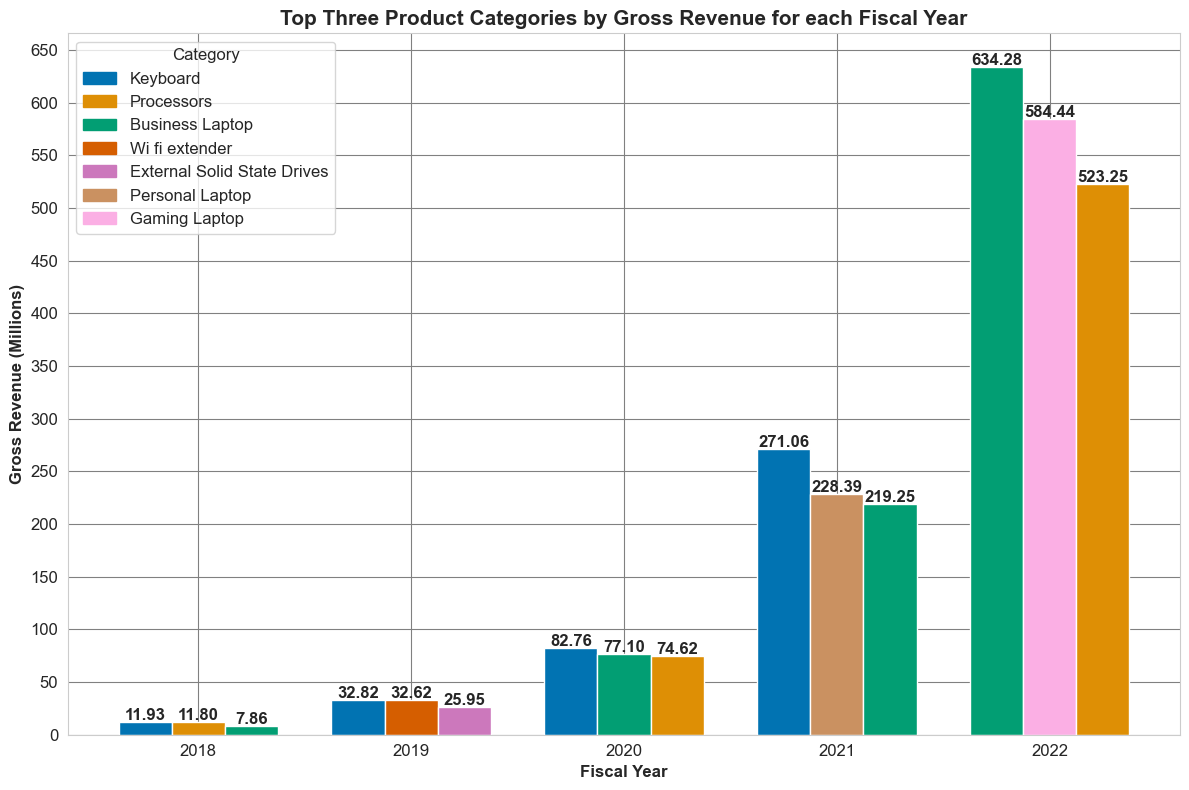

In [23]:
# Grouped Bar Chart

plt.figure(figsize=(12, 8))

unique_categories = top_categories['category'].unique()

# Create a dictionary to map categories to colors
category_colors = {}
for i, category in enumerate(unique_categories):
    category_colors[category] = sns.color_palette('colorblind', len(unique_categories))[i]

# Plot and display values above bars
bar_width = 0.25
for index, row in top_categories.iterrows():
    x_position = row['fiscal_year'] + (row['rank'] - 2) * bar_width
    plt.bar(x_position, row['gross_sales_millions'], width=bar_width, label=row['category'], color=category_colors[row['category']])
    plt.text(x_position, row['gross_sales_millions'] - 1, f'{row["gross_sales_millions"]:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top Three Product Categories by Gross Revenue for each Fiscal Year', fontsize=15, fontweight='bold')
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Gross Revenue (Millions)', fontsize=12, fontweight='bold')
plt.yticks(range(0, int(max(top_categories['gross_sales_millions']))+50, 50), fontsize=12)
plt.xticks(fontsize=12)

# Custom legend
handles = [plt.Rectangle((0,0),1,1, color=category_colors[category]) for category in category_colors]
plt.legend(handles, category_colors.keys(), title='Category', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
# Line Chart, find all years for each top product

top_categories_line = gross_revenue_fiscal_year[gross_revenue_fiscal_year['category'].isin(top_categories['category'].unique().tolist())]
top_categories_line.sort_values(['category', 'fiscal_year']).head(5)

,fiscal_year,category,gross_sales_millions
1,2018,Business Laptop,7.8633
15,2019,Business Laptop,21.4578
29,2020,Business Laptop,77.0953
43,2021,Business Laptop,219.2483
57,2022,Business Laptop,634.2842


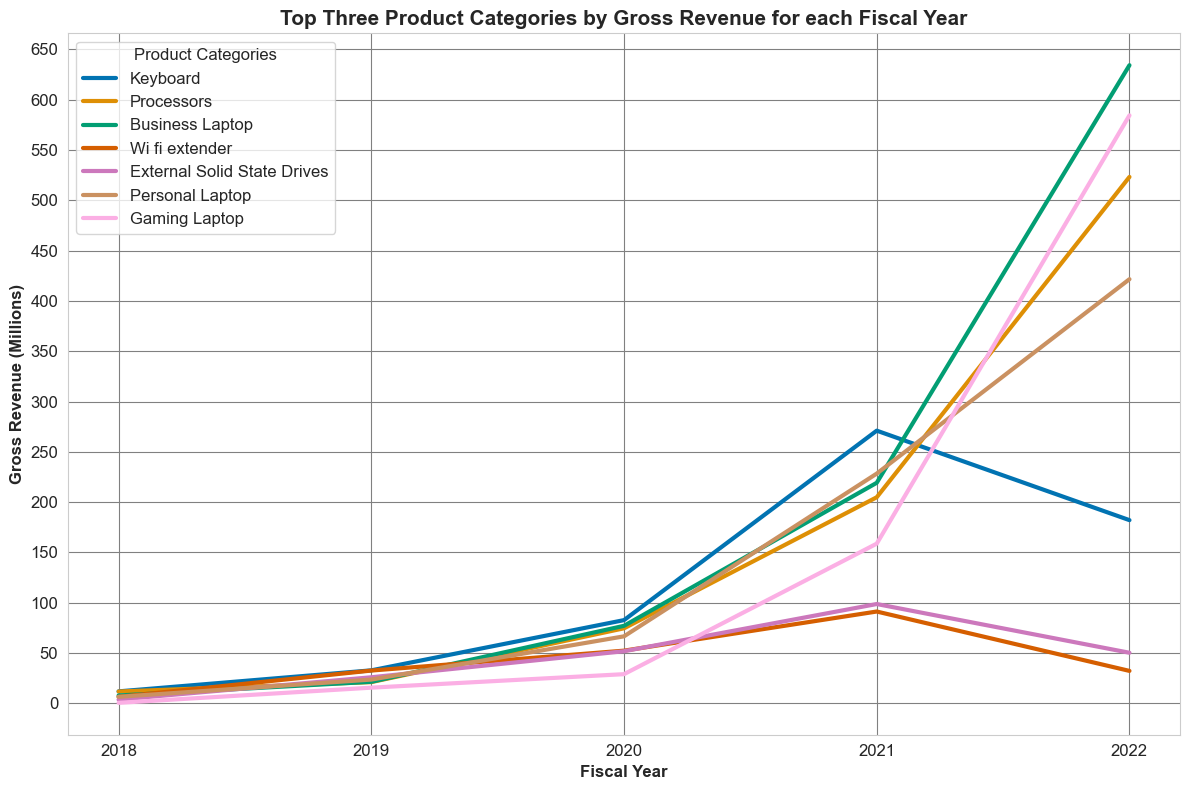

In [25]:
# Line Chart

plt.figure(figsize=(12, 8))

unique_categories = top_categories['category'].unique()

# Create a dictionary to map categories to colors
category_colors = {}
for i, category in enumerate(unique_categories):
    category_colors[category] = sns.color_palette('colorblind', len(unique_categories))[i]

# Plot
for category in unique_categories:
    category_data = top_categories_line[top_categories_line['category'] == category]   
    sns.lineplot(data=category_data, x='fiscal_year', y='gross_sales_millions', label=category, color=category_colors[category], linewidth=3)

plt.title('Top Three Product Categories by Gross Revenue for each Fiscal Year', fontsize=15, fontweight='bold')
plt.legend(title='Product Categories', title_fontsize=12, fontsize=12)
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Gross Revenue (Millions)', fontsize=12, fontweight='bold')
plt.yticks(range(0, int(max(top_categories['gross_sales_millions']))+50, 50), fontsize=12)
plt.xticks(range(int(top_categories_line['fiscal_year'].min()), int(top_categories_line['fiscal_year'].max()) + 1), fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
# Net Profit

# Group by fiscal_year and product category
net_profit_fiscal_year = merge.groupby(['fiscal_year', 'category'])['net_profit'].sum().reset_index().rename(columns={'net_profit':'net_profit_millions'})

# Round to get rid of scientific notation
net_profit_fiscal_year['net_profit_millions'] = (net_profit_fiscal_year['net_profit_millions'] / 1000000).round(4)

net_profit_fiscal_year.head(5)

,fiscal_year,category,net_profit_millions
0,2018,Batteries,0.0000
1,2018,Business Laptop,0.7044
2,2018,External Solid State Drives,0.3694
3,2018,Gaming Laptop,0.0304
4,2018,Graphic Card,0.1844


In [27]:
# Find top 3 categories for each fiscal year
top_categories = net_profit_fiscal_year.groupby('fiscal_year').apply(lambda x: x.nlargest(3, 'net_profit_millions')).reset_index(drop=True)

# Add rank column
top_categories['rank'] = (top_categories.groupby('fiscal_year')['net_profit_millions'].rank(ascending=False, method='dense')).astype('int8')

# Reoganize columns
top_categories = top_categories[['fiscal_year', 'rank', 'category', 'net_profit_millions']]

top_categories

,fiscal_year,rank,category,net_profit_millions
0,2018,1,Keyboard,1.1353
1,2018,2,Processors,1.0205
2,2018,3,Business Laptop,0.7044
3,2019,1,Keyboard,4.4584
4,2019,2,Wi fi extender,4.2047
5,2019,3,External Solid State Drives,3.4960
6,2020,1,Keyboard,7.3451
7,2020,2,Processors,6.9168
8,2020,3,Business Laptop,6.7784
9,2021,1,Keyboard,22.1932


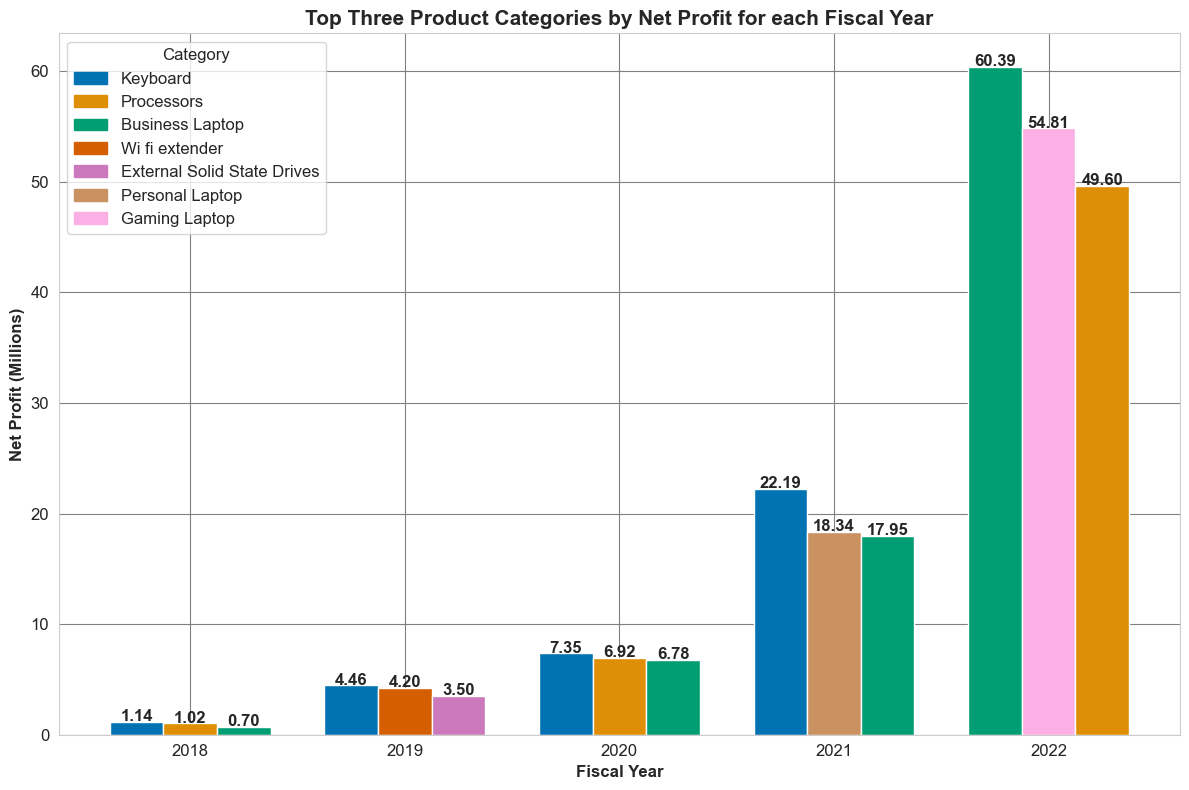

In [28]:
# Grouped Bar Chart

plt.figure(figsize=(12, 8))

unique_categories = top_categories['category'].unique()

# Create a dictionary to map categories to colors
category_colors = {}
for i, category in enumerate(unique_categories):
    category_colors[category] = sns.color_palette('colorblind', len(unique_categories))[i]

# Plot and display values above bars
bar_width = 0.25
for index, row in top_categories.iterrows():
    x_position = row['fiscal_year'] + (row['rank'] - 2) * bar_width
    plt.bar(x_position, row['net_profit_millions'], width=bar_width, label=row['category'], color=category_colors[row['category']])
    plt.text(x_position, row['net_profit_millions'] - 0.2, f'{row["net_profit_millions"]:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top Three Product Categories by Net Profit for each Fiscal Year', fontsize=15, fontweight='bold')
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Net Profit (Millions)', fontsize=12, fontweight='bold')
plt.yticks(range(0, int(max(top_categories['net_profit_millions']))+10, 10), fontsize=12)
plt.xticks(fontsize=12)

# Custom legend
handles = [plt.Rectangle((0,0),1,1, color=category_colors[category]) for category in category_colors]
plt.legend(handles, category_colors.keys(), title='Category', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

# Request 2
## Analyze the distribution of manufacturing costs across different product categories and determine which categories have the highest manufacturing cost.
## Determine whether or not the manufacturing costs is justified

In [29]:
sc_fact_sales_monthly.head(5)

,date,fiscal_year,product_code,customer_code,sold_quantity,gross_sales,net_invoice_sales,net_sales,cost_of_goods,gross_margin_pct,net_profit
0,2017-09-01,2018,A6218160101,70008169,81,1069.2729,967.319139,673.989914,340.676395,49.453784,333.313519
1,2017-09-01,2018,A6218160101,90008165,157,2072.5413,1482.119149,870.389878,660.323383,24.134759,210.066495
2,2017-09-01,2018,A6218160101,90008166,126,1663.3134,1183.649231,647.680403,529.941059,18.178618,117.739344
3,2017-09-01,2018,A6218160101,90008167,160,2112.1440,1700.914928,996.808779,672.941027,32.490459,323.867752
4,2017-09-01,2018,A6218160101,70008170,120,1584.1080,1283.693887,789.431187,504.705770,36.067161,284.725417


In [30]:
sc_manufacturing_cost.head(5)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [31]:
sc_dim_product.head(5)

,product_code,product,division,segment,category,variant
0,A0118150101,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
1,A0118150102,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Plus
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Premium
3,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Premium Plus
4,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,P & A,Peripherals,Internal HDD,Standard


In [32]:
# Merge sc_manufacturing_cost and sc_dim_product
merge = pd.merge(sc_manufacturing_cost, sc_dim_product, how='inner', on='product_code')
merge.head(5)

,product_code,cost_year,manufacturing_cost,product,division,segment,category,variant
0,A0118150101,2018,4.6190,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
1,A0118150101,2019,4.2033,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
2,A0118150101,2020,5.0207,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
3,A0118150101,2021,5.5172,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Standard
4,A0118150102,2018,5.6036,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,P & A,Peripherals,Internal HDD,Plus


In [33]:
# Top 10 average manufacturing costs by product category and cost year
merge.groupby(['category','cost_year'])['manufacturing_cost'].mean().reset_index().rename(columns={'manufacturing_cost': 'avg_manufacturing_cost'}).sort_values('avg_manufacturing_cost', ascending=False).head(10)

,category,cost_year,avg_manufacturing_cost
49,Personal Desktop,2022,249.774436
48,Personal Desktop,2021,234.783800
47,Personal Desktop,2020,216.370114
45,Personal Desktop,2018,199.094000
19,Gaming Laptop,2022,194.956423
46,Personal Desktop,2019,194.312400
18,Gaming Laptop,2021,182.569183
9,Business Laptop,2022,179.895612
17,Gaming Laptop,2020,170.314533
8,Business Laptop,2021,161.196756


In [34]:
# Merge sc_fact_sales_monthly, sc_fact_sales_monthly and sc_dim_product

merge = pd.merge(sc_fact_sales_monthly, sc_manufacturing_cost, how='left', left_on=['product_code', 'fiscal_year'], right_on=['product_code', 'cost_year'])

merge = pd.merge(merge, sc_dim_product, how='left', left_on=['product_code'], right_on=['product_code'])

merge.head(5)

,date,fiscal_year,product_code,customer_code,sold_quantity,gross_sales,net_invoice_sales,net_sales,cost_of_goods,gross_margin_pct,net_profit,cost_year,manufacturing_cost,product,division,segment,category,variant
0,2017-09-01,2018,A6218160101,70008169,81,1069.2729,967.319139,673.989914,340.676395,49.453784,333.313519,2018,3.8917,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
1,2017-09-01,2018,A6218160101,90008165,157,2072.5413,1482.119149,870.389878,660.323383,24.134759,210.066495,2018,3.8917,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
2,2017-09-01,2018,A6218160101,90008166,126,1663.3134,1183.649231,647.680403,529.941059,18.178618,117.739344,2018,3.8917,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
3,2017-09-01,2018,A6218160101,90008167,160,2112.1440,1700.914928,996.808779,672.941027,32.490459,323.867752,2018,3.8917,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard
4,2017-09-01,2018,A6218160101,70008170,120,1584.1080,1283.693887,789.431187,504.705770,36.067161,284.725417,2018,3.8917,AQ Digit SSD,N & S,Storage,External Solid State Drives,Standard


In [35]:
# Add millions unit to columns to get rid of scientific notation for readability 
merge['manufacturing_cost_millions'] = merge['manufacturing_cost'] / 1000000
merge['cost_of_goods_millions'] = merge['cost_of_goods'] / 1000000
merge['gross_sales_millions'] = merge['gross_sales'] / 1000000
merge['net_sales_millions'] = merge['net_sales'] / 1000000
merge['net_profit_millions'] = merge['net_profit'] / 1000000

# Drop redundant columns
merge = merge[['category', 'fiscal_year', 'manufacturing_cost_millions', 'cost_of_goods_millions', 'gross_sales_millions', 'net_sales_millions', 'net_profit_millions']]

merge.head(5)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions
0,External Solid State Drives,2018,0.000004,0.000341,0.001069,0.000674,0.000333
1,External Solid State Drives,2018,0.000004,0.000660,0.002073,0.000870,0.000210
2,External Solid State Drives,2018,0.000004,0.000530,0.001663,0.000648,0.000118
3,External Solid State Drives,2018,0.000004,0.000673,0.002112,0.000997,0.000324
4,External Solid State Drives,2018,0.000004,0.000505,0.001584,0.000789,0.000285


In [36]:
# Group
cat_manu = merge.groupby(['category', 'fiscal_year'], observed=True)[['manufacturing_cost_millions', 'cost_of_goods_millions', 'gross_sales_millions', 'net_sales_millions', 'net_profit_millions']].sum().reset_index()

cat_manu.head(10)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions
0,External Solid State Drives,2018,0.007281,1.205270,3.776649,1.574636,0.369366
1,External Solid State Drives,2019,0.037544,8.501025,25.950667,11.997005,3.495980
2,External Solid State Drives,2020,0.095339,17.330772,51.842667,21.672505,4.341733
3,External Solid State Drives,2021,0.135057,32.382072,98.751802,40.676528,8.294456
4,External Solid State Drives,2022,0.051095,16.490668,50.320706,21.386190,4.895522
5,Wi fi extender,2018,0.007041,2.114107,6.467329,2.702933,0.588825
6,Wi fi extender,2019,0.042384,10.836602,32.623904,15.041339,4.204737
7,Wi fi extender,2020,0.103286,17.185022,52.401256,21.982879,4.797858
8,Wi fi extender,2021,0.180028,29.993021,91.296726,37.577294,7.584273
9,Wi fi extender,2022,0.046228,10.558543,32.288341,13.689059,3.130516


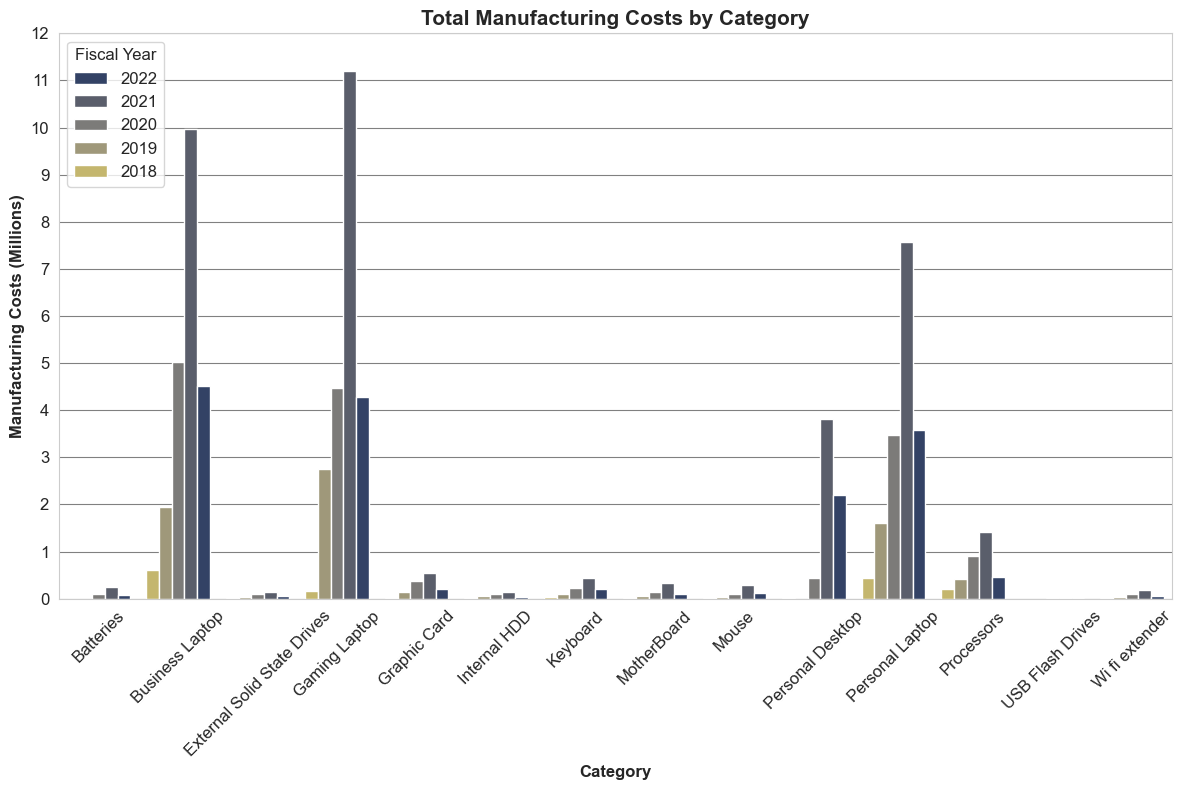

In [37]:
# Grouped Bar Chart of Total Manufacturing Costs

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=cat_manu, x='category', y='manufacturing_cost_millions', hue='fiscal_year', palette=sns.color_palette("cividis", len(cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Total Manufacturing Costs by Category', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Manufacturing Costs (Millions)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(np.arange(0, cat_manu['manufacturing_cost_millions'].max() + 1, 1), fontsize=12)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

In [38]:
# Filter to only include the categories with the most manufacuting costs
top_categories = ['Business Laptop', 'Gaming Laptop', 'Personal Desktop', 'Personal Laptop', 'Processors']
top_cat_manu = cat_manu[cat_manu['category'].isin(top_categories)].reset_index(drop=True).copy()

# Get rid of unused categories
top_cat_manu['category'] = pd.Categorical(top_cat_manu['category'], categories=top_categories)

top_cat_manu.head(5)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions
0,Processors,2018,0.207311,3.888175,11.800166,4.908640,1.020465
1,Processors,2019,0.416171,6.756119,21.155212,9.738555,2.982436
2,Processors,2020,0.903897,24.406399,74.623741,31.323240,6.916841
3,Processors,2021,1.415394,67.646903,204.866906,84.331290,16.684387
4,Processors,2022,0.467249,172.059872,523.250527,221.655607,49.595735


In [39]:
top_cat_manu['category'].unique()

['Processors', 'Business Laptop', 'Gaming Laptop', 'Personal Desktop', 'Personal Laptop']
Categories (5, object): ['Business Laptop', 'Gaming Laptop', 'Personal Desktop', 'Personal Laptop', 'Processors']

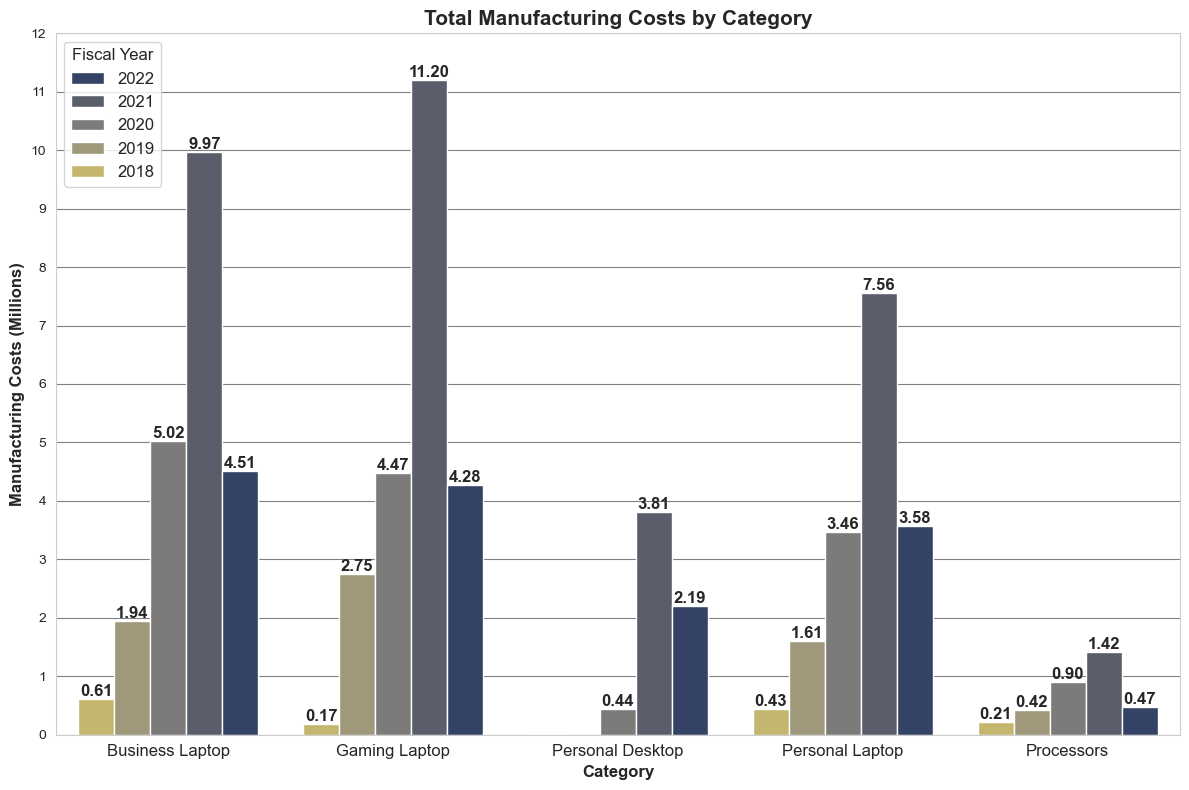

In [40]:
# Grouped Bar Chart of Total Manufacturing Costs of top categories

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=top_cat_manu, x='category', y='manufacturing_cost_millions', hue='fiscal_year', palette=sns.color_palette("cividis", len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Total Manufacturing Costs by Category', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Manufacturing Costs (Millions)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(np.arange(0, top_cat_manu['manufacturing_cost_millions'].max() + 1, 1))

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
        
# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

In [41]:
top_cat_manu.columns

Index(['category', 'fiscal_year', 'manufacturing_cost_millions',
       'cost_of_goods_millions', 'gross_sales_millions', 'net_sales_millions',
       'net_profit_millions'],
      dtype='object')

In [42]:
top_categories

['Business Laptop',
 'Gaming Laptop',
 'Personal Desktop',
 'Personal Laptop',
 'Processors']

In [43]:
# Add calculated columns to cat_manu
cat_manu['manufacturing_gross_margin_pct'] = ((cat_manu['gross_sales_millions'] - cat_manu['manufacturing_cost_millions']) / cat_manu['gross_sales_millions']) * 100
cat_manu['gross_margin_pct'] = ((cat_manu['gross_sales_millions'] - cat_manu['cost_of_goods_millions']) / cat_manu['gross_sales_millions']) * 100
cat_manu['net_profit_gross_sales_margin_pct'] = (cat_manu['net_profit_millions'] / cat_manu['gross_sales_millions']) * 100
cat_manu['net_profit_net_sales_margin_pct'] = (cat_manu['net_profit_millions'] / cat_manu['net_sales_millions']) * 100

# Replace invalid values with 0
cat_manu.replace([-np.inf, np.inf, np.nan], 0, inplace=True)

cat_manu.head(10)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct
0,External Solid State Drives,2018,0.007281,1.205270,3.776649,1.574636,0.369366,99.807220,68.086261,9.780246,23.457210
1,External Solid State Drives,2019,0.037544,8.501025,25.950667,11.997005,3.495980,99.855327,67.241592,13.471638,29.140438
2,External Solid State Drives,2020,0.095339,17.330772,51.842667,21.672505,4.341733,99.816099,66.570446,8.374826,20.033370
3,External Solid State Drives,2021,0.135057,32.382072,98.751802,40.676528,8.294456,99.863236,67.208627,8.399296,20.391259
4,External Solid State Drives,2022,0.051095,16.490668,50.320706,21.386190,4.895522,99.898462,67.228862,9.728644,22.891044
5,Wi fi extender,2018,0.007041,2.114107,6.467329,2.702933,0.588825,99.891134,67.310968,9.104615,21.784688
6,Wi fi extender,2019,0.042384,10.836602,32.623904,15.041339,4.204737,99.870083,66.783246,12.888516,27.954539
7,Wi fi extender,2020,0.103286,17.185022,52.401256,21.982879,4.797858,99.802894,67.204943,9.155998,21.825429
8,Wi fi extender,2021,0.180028,29.993021,91.296726,37.577294,7.584273,99.802810,67.147758,8.307278,20.183128
9,Wi fi extender,2022,0.046228,10.558543,32.288341,13.689059,3.130516,99.856826,67.299208,9.695500,22.868745


In [44]:
# Add calculated columns to top_cat_manu
top_cat_manu['manufacturing_gross_margin_pct'] = ((top_cat_manu['gross_sales_millions'] - top_cat_manu['manufacturing_cost_millions']) / top_cat_manu['gross_sales_millions']) * 100
top_cat_manu['gross_margin_pct'] = ((top_cat_manu['gross_sales_millions'] - top_cat_manu['cost_of_goods_millions']) / top_cat_manu['gross_sales_millions']) * 100
top_cat_manu['net_profit_gross_sales_margin_pct'] = (top_cat_manu['net_profit_millions'] / top_cat_manu['gross_sales_millions']) * 100
top_cat_manu['net_profit_net_sales_margin_pct'] = (top_cat_manu['net_profit_millions'] / top_cat_manu['net_sales_millions']) * 100

# Replace invalid values with 0
top_cat_manu.replace([-np.inf, np.inf, np.nan], 0, inplace=True)

top_cat_manu.head(10)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct
0,Processors,2018,0.207311,3.888175,11.800166,4.908640,1.020465,98.243148,67.049829,8.647890,20.789165
1,Processors,2019,0.416171,6.756119,21.155212,9.738555,2.982436,98.032774,68.064043,14.097877,30.625034
2,Processors,2020,0.903897,24.406399,74.623741,31.323240,6.916841,98.788727,67.294056,9.268955,22.082138
3,Processors,2021,1.415394,67.646903,204.866906,84.331290,16.684387,99.309115,66.980073,8.144013,19.784337
4,Processors,2022,0.467249,172.059872,523.250527,221.655607,49.595735,99.910703,67.117114,9.478392,22.375132
5,Business Laptop,2018,0.611427,2.571134,7.863334,3.275516,0.704381,92.224329,67.302238,8.957795,21.504441
6,Business Laptop,2019,1.937479,6.965961,21.457846,9.930554,2.964593,90.970767,67.536532,13.815893,29.853250
7,Business Laptop,2020,5.021622,25.530532,77.095277,32.308895,6.778363,93.486472,66.884441,8.792190,20.979867
8,Business Laptop,2021,9.965194,72.550049,219.248303,90.496094,17.946045,95.454836,66.909642,8.185261,19.830740
9,Business Laptop,2022,4.511782,208.160420,634.284189,268.554433,60.394013,99.288681,67.181837,9.521601,22.488555


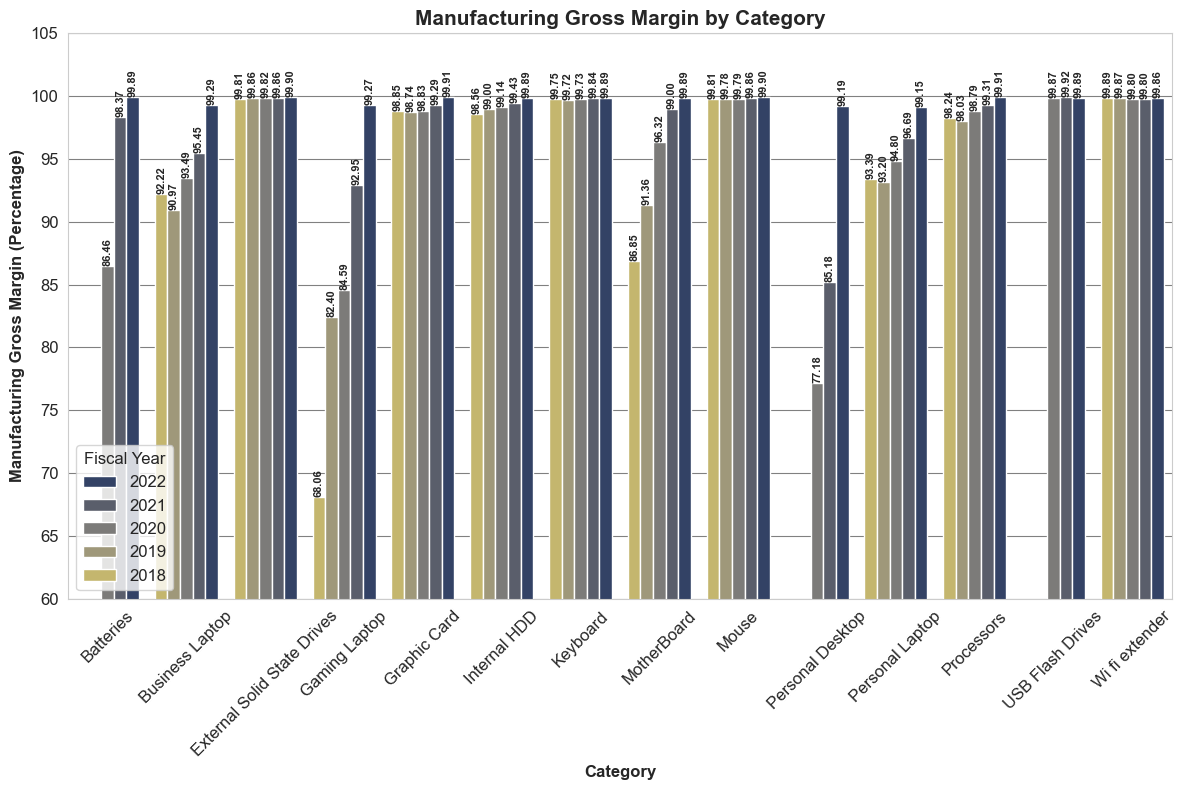

In [45]:
# Grouped Bar Chart of Manufacturing Gross Margin 

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=cat_manu, x='category', y='manufacturing_gross_margin_pct', hue='fiscal_year', palette=sns.color_palette("cividis", len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Manufacturing Gross Margin by Category', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Manufacturing Gross Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(60, 105)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)
        
# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='lower left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

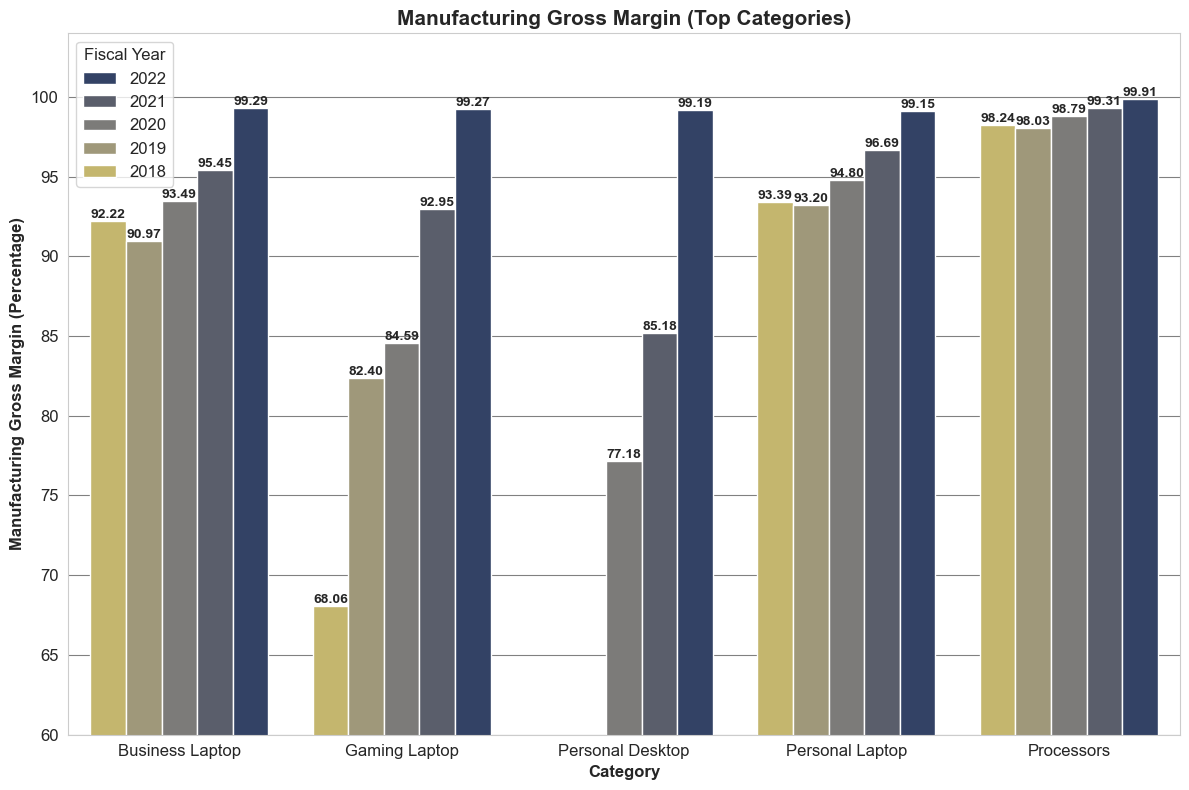

In [46]:
# Grouped Bar Chart of Manufacturing Gross Margin of top categories

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=top_cat_manu, x='category', y='manufacturing_gross_margin_pct', hue='fiscal_year', palette=sns.color_palette("cividis", len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Manufacturing Gross Margin (Top Categories)', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Manufacturing Gross Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(60, 104)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

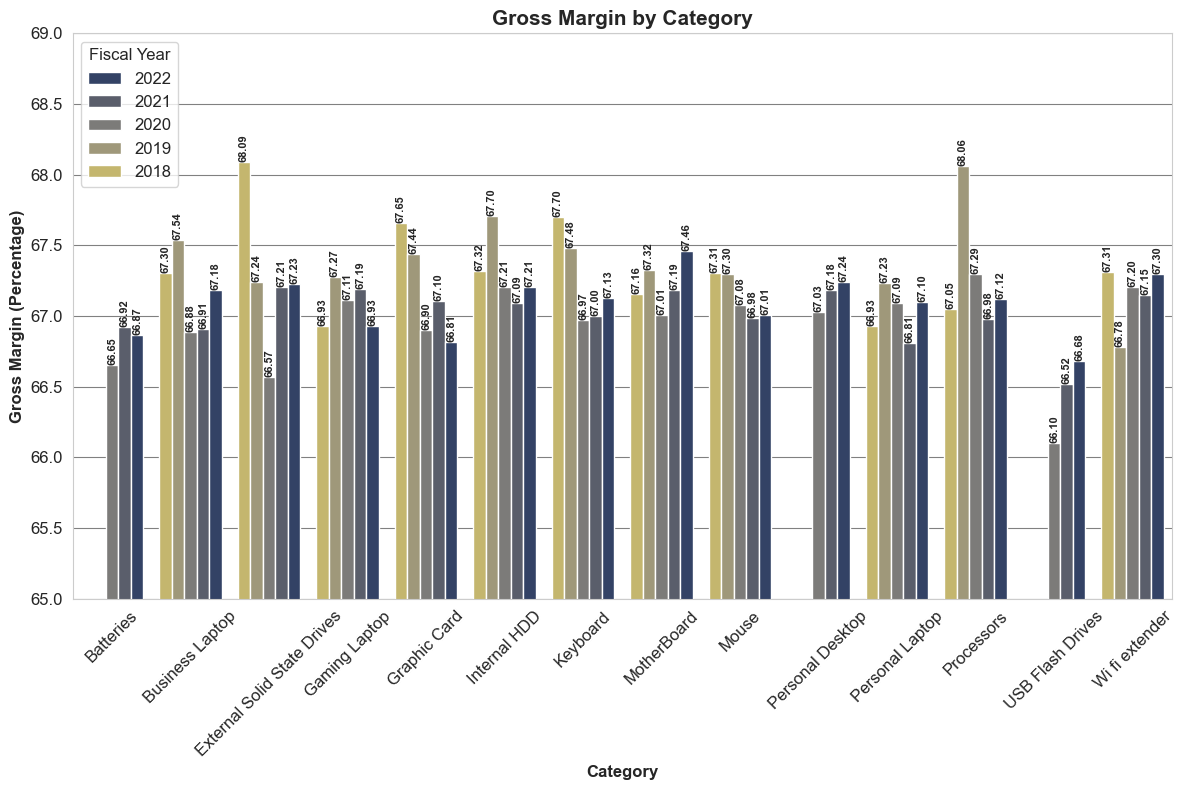

In [47]:
# Grouped Bar Chart of Gross Margin

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=cat_manu, x='category', y='gross_margin_pct', hue='fiscal_year', palette=sns.color_palette("cividis", len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Gross Margin by Category', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Gross Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(65, 69)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='upper left', fontsize=12, title_fontsize=12)


plt.tight_layout()
plt.show()

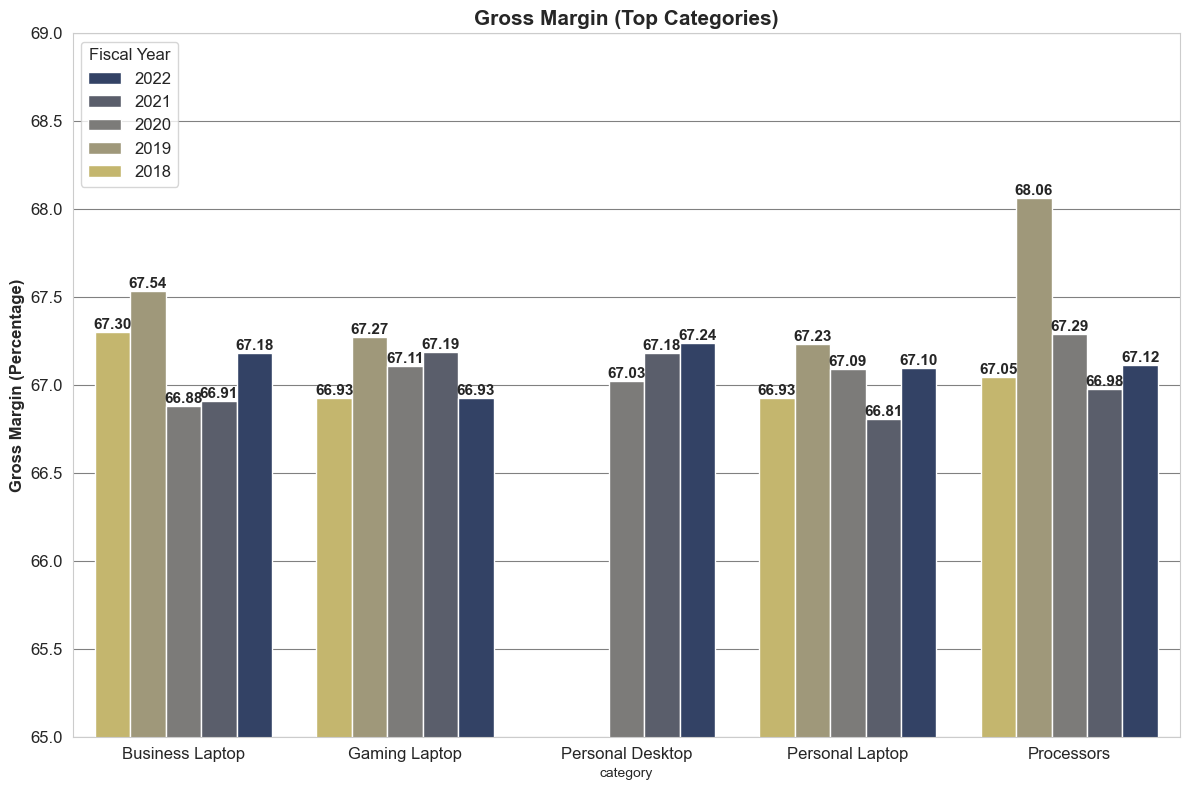

In [48]:
# Grouped Bar Chart of Gross Margin of top categories

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=top_cat_manu, x='category', y='gross_margin_pct', hue='fiscal_year', palette=sns.color_palette('cividis', len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Gross Margin (Top Categories)', fontsize=15, fontweight='bold')
plt.ylabel('Gross Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(65, 69)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold', rotation=0)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

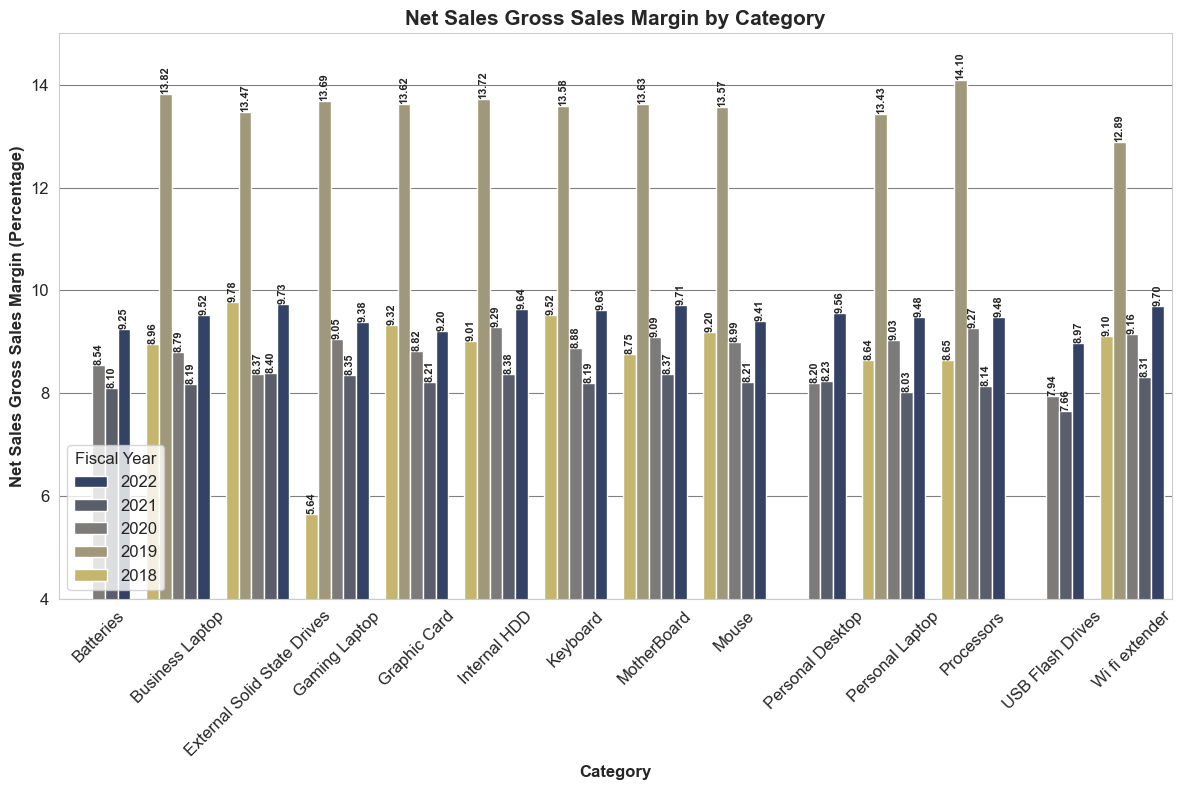

In [49]:
# Grouped Bar Chart of Net Profit Gross Sales Margin

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=cat_manu, x='category', y='net_profit_gross_sales_margin_pct', hue='fiscal_year', palette=sns.color_palette("cividis", len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Net Sales Gross Sales Margin by Category', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Net Sales Gross Sales Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(4, 15)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='lower left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

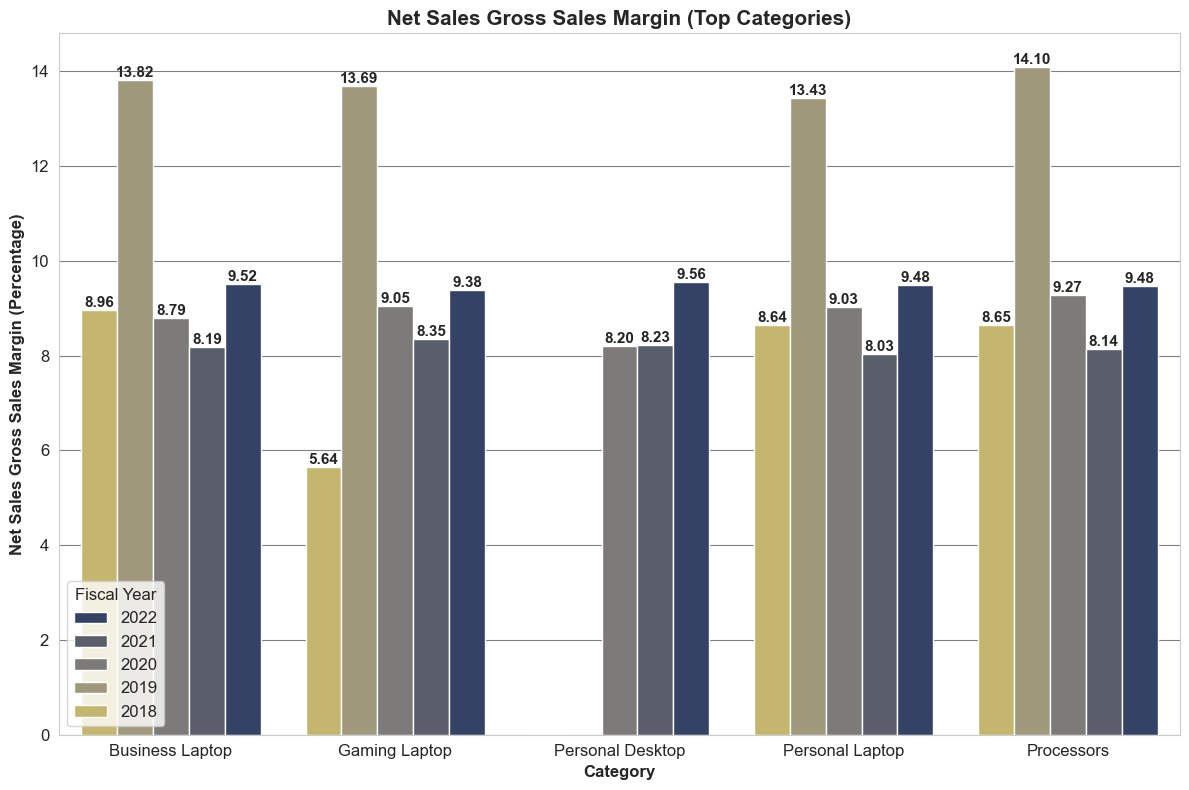

In [50]:
# Grouped Bar Chart of Net Profit Gross Sales Margin of top categories

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=top_cat_manu, x='category', y='net_profit_gross_sales_margin_pct', hue='fiscal_year', palette=sns.color_palette('cividis', len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Net Sales Gross Sales Margin (Top Categories)', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Net Sales Gross Sales Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold', rotation=0)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='lower left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

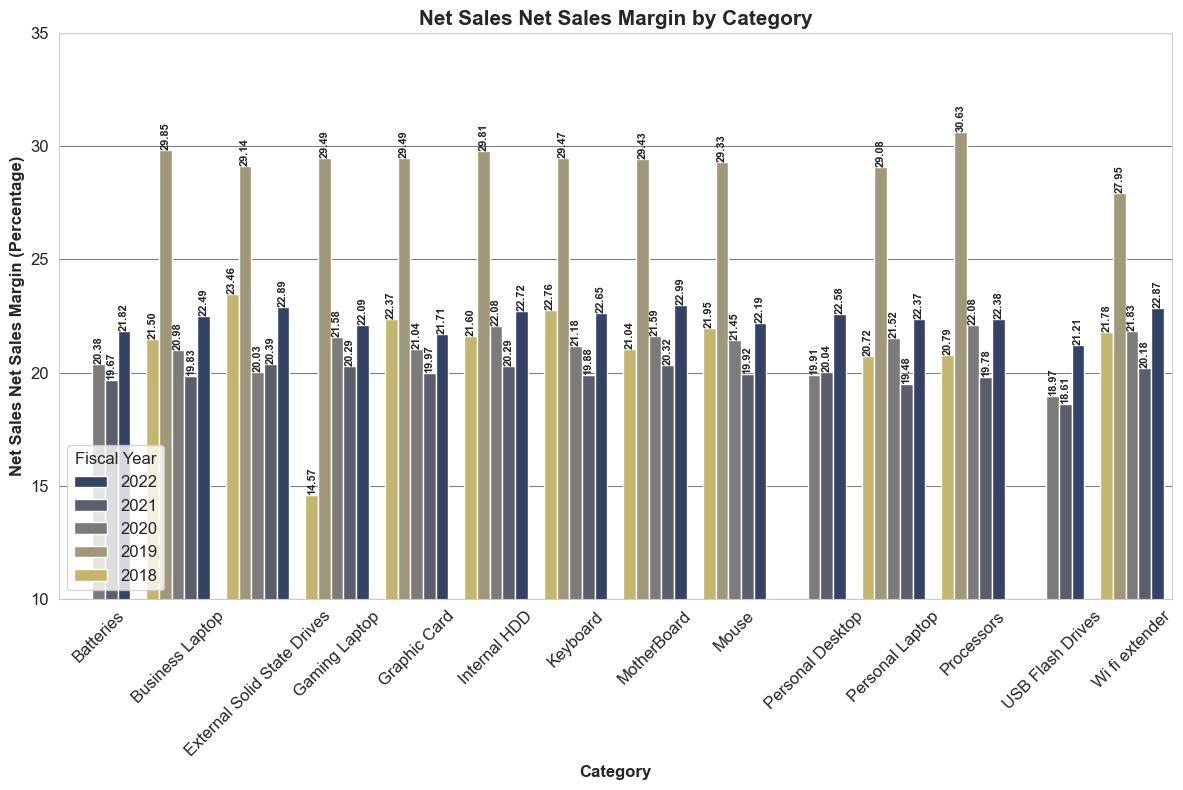

In [51]:
# Grouped Bar Chart of Net Profit Net Sales Margin

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=cat_manu, x='category', y='net_profit_net_sales_margin_pct', hue='fiscal_year', palette=sns.color_palette("cividis", len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Net Sales Net Sales Margin by Category', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Net Sales Net Sales Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(10, 35)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='lower left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

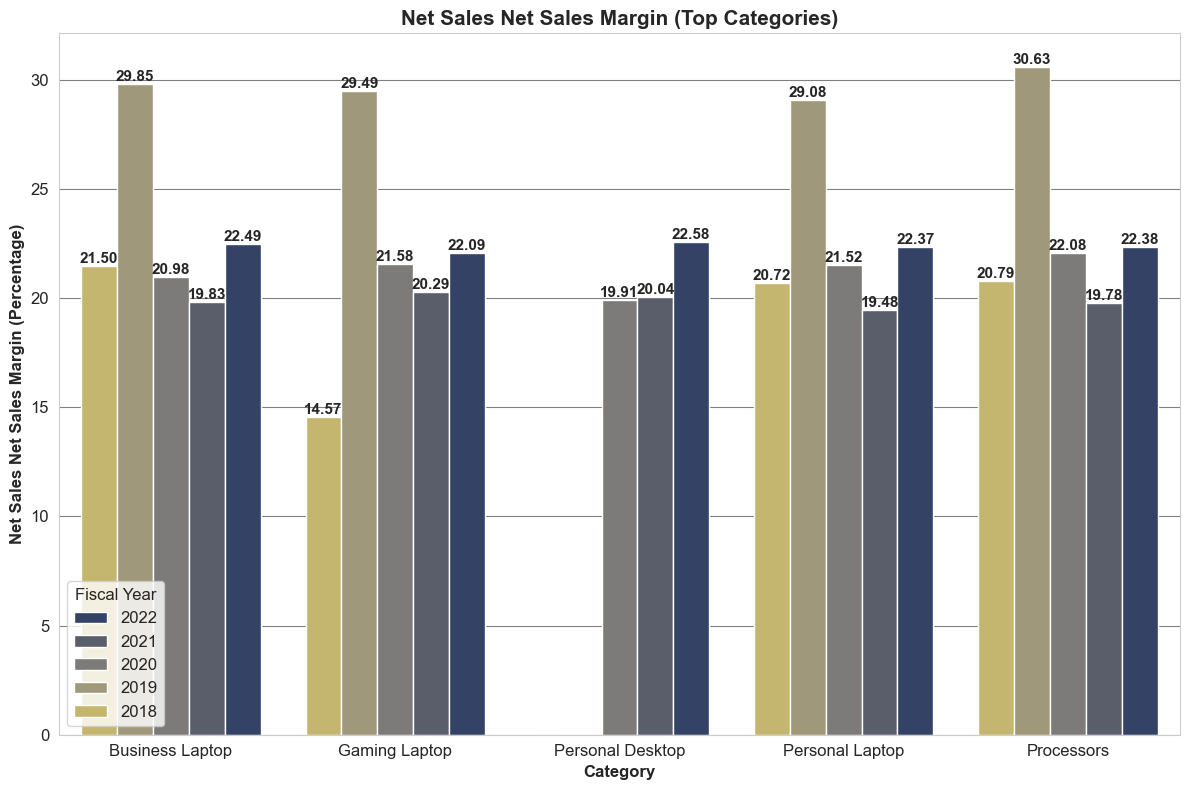

In [52]:
# Grouped Bar Chart of Net Profit Net Sales Margin of top categories

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=top_cat_manu, x='category', y='net_profit_net_sales_margin_pct', hue='fiscal_year', palette=sns.color_palette('cividis', len(top_cat_manu['fiscal_year'].unique()))[::-1])

plt.title('Net Sales Net Sales Margin (Top Categories)', fontsize=15, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Net Sales Net Sales Margin (Percentage)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display values above bars
for p in ax.patches:
    height = p.get_height()
    if np.isfinite(height) and height > 0.01:
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold', rotation=0)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Fiscal Year', loc='lower left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

In [82]:
# Calculate total net profit by fiscal year
total_net_profit = cat_manu.groupby('fiscal_year')['net_profit_millions'].transform('sum')

# Merge 
cat_manu_with_total = cat_manu.assign(total_net_profit=total_net_profit)

# Calculate net_profit_percentage
cat_manu_with_total['net_profit_percentage'] = (cat_manu_with_total['net_profit_millions'] / cat_manu_with_total['total_net_profit']) * 100

# Drop unecessary columns
cat_manu_with_total.drop(columns=['total_net_profit'], inplace=True)

cat_manu_with_total.head(5)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct,net_profit_percentage
0,External Solid State Drives,2018,0.007281,1.205270,3.776649,1.574636,0.369366,99.807220,68.086261,9.780246,23.457210,6.997605
1,External Solid State Drives,2019,0.037544,8.501025,25.950667,11.997005,3.495980,99.855327,67.241592,13.471638,29.140438,12.358109
2,External Solid State Drives,2020,0.095339,17.330772,51.842667,21.672505,4.341733,99.816099,66.570446,8.374826,20.033370,9.067984
3,External Solid State Drives,2021,0.135057,32.382072,98.751802,40.676528,8.294456,99.863236,67.208627,8.399296,20.391259,6.075599
4,External Solid State Drives,2022,0.051095,16.490668,50.320706,21.386190,4.895522,99.898462,67.228862,9.728644,22.891044,1.586246


In [76]:
cat_manu_with_total[cat_manu_with_total['fiscal_year'] == 2021].sort_values('net_profit_percentage', ascending=False)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct,net_profit_percentage
27,Keyboard,2021,0.442359,89.449023,271.062986,111.642238,22.193214,99.836806,67.000650,8.187475,19.878869,16.256289
61,Personal Laptop,2021,7.563229,75.809441,228.389377,94.149583,18.340141,96.688450,66.806932,8.030208,19.479791,13.433955
47,Business Laptop,2021,9.965194,72.550049,219.248303,90.496094,17.946045,95.454836,66.909642,8.185261,19.830740,13.145283
37,Mouse,2021,0.287843,68.883006,208.630154,86.012455,17.129449,99.862032,66.983198,8.210438,19.915080,12.547136
42,Processors,2021,1.415394,67.646903,204.866906,84.331290,16.684387,99.309115,66.980073,8.144013,19.784337,12.221132
52,Gaming Laptop,2021,11.196823,52.090731,158.756496,65.347081,13.256350,92.947172,67.188284,8.350115,20.286063,9.710132
3,External Solid State Drives,2021,0.135057,32.382072,98.751802,40.676528,8.294456,99.863236,67.208627,8.399296,20.391259,6.075599
8,Wi fi extender,2021,0.180028,29.993021,91.296726,37.577294,7.584273,99.802810,67.147758,8.307278,20.183128,5.555398
17,Graphic Card,2021,0.539568,25.069244,76.205249,31.325694,6.256451,99.291954,67.102996,8.209999,19.972265,4.582782
32,MotherBoard,2021,0.323109,10.637702,32.419134,13.350577,2.712875,99.003338,67.186964,8.368129,20.320282,1.987151


In [77]:
cat_manu_with_total[cat_manu_with_total['fiscal_year'] == 2020].sort_values('net_profit_percentage', ascending=False)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct,net_profit_percentage
26,Keyboard,2020,0.220618,27.335710,82.757980,34.680848,7.345138,99.733417,66.969094,8.875444,21.179234,15.340785
41,Processors,2020,0.903897,24.406399,74.623741,31.323240,6.916841,98.788727,67.294056,9.268955,22.082138,14.446260
46,Business Laptop,2020,5.021622,25.530532,77.095277,32.308895,6.778363,93.486472,66.884441,8.792190,20.979867,14.157040
60,Personal Laptop,2020,3.463596,21.930495,66.643770,27.945516,6.015021,94.802821,67.092956,9.025631,21.524099,12.562751
7,Wi fi extender,2020,0.103286,17.185022,52.401256,21.982879,4.797858,99.802894,67.204943,9.155998,21.825429,10.020630
36,Mouse,2020,0.104680,16.143529,49.032020,20.551758,4.408229,99.786506,67.075537,8.990511,21.449400,9.206865
2,External Solid State Drives,2020,0.095339,17.330772,51.842667,21.672505,4.341733,99.816099,66.570446,8.374826,20.033370,9.067984
16,Graphic Card,2020,0.374326,10.575631,31.948354,13.393824,2.818193,98.828339,66.897728,8.821090,21.040988,5.885974
51,Gaming Laptop,2020,4.473719,9.550467,29.039698,12.178157,2.627690,84.594471,67.112376,9.048614,21.577077,5.488097
21,Internal HDD,2020,0.092425,3.537007,10.785418,4.539035,1.002028,99.143054,67.205657,9.290583,22.075798,2.092799


In [78]:
cat_manu_with_total[cat_manu_with_total['fiscal_year'] == 2019].sort_values('net_profit_percentage', ascending=False)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct,net_profit_percentage
25,Keyboard,2019,0.091583,10.672843,32.822436,15.131291,4.458448,99.720974,67.483086,13.583537,29.465085,15.760383
6,Wi fi extender,2019,0.042384,10.836602,32.623904,15.041339,4.204737,99.870083,66.783246,12.888516,27.954539,14.863528
1,External Solid State Drives,2019,0.037544,8.501025,25.950667,11.997005,3.495980,99.855327,67.241592,13.471638,29.140438,12.358109
59,Personal Laptop,2019,1.609153,7.750320,23.653317,10.928107,3.177787,93.196923,67.233686,13.434848,29.079026,11.233314
40,Processors,2019,0.416171,6.756119,21.155212,9.738555,2.982436,98.032774,68.064043,14.097877,30.625034,10.542757
45,Business Laptop,2019,1.937479,6.965961,21.457846,9.930554,2.964593,90.970767,67.536532,13.815893,29.853250,10.479684
35,Mouse,2019,0.042932,6.483041,19.825923,9.173127,2.690086,99.783453,67.300183,13.568528,29.325726,9.509315
50,Gaming Laptop,2019,2.750236,5.113784,15.626028,7.252549,2.138765,82.399651,67.273935,13.687192,29.489834,7.560423
15,Graphic Card,2019,0.133908,3.465480,10.643597,4.914936,1.449456,98.741894,67.440709,13.618101,29.490840,5.123751
20,Internal HDD,2019,0.046186,1.494731,4.628319,2.129538,0.634807,99.002098,67.704670,13.715710,29.809606,2.244009


In [79]:
cat_manu_with_total[cat_manu_with_total['fiscal_year'] == 2018].sort_values('net_profit_percentage', ascending=False)

,category,fiscal_year,manufacturing_cost_millions,cost_of_goods_millions,gross_sales_millions,net_sales_millions,net_profit_millions,manufacturing_gross_margin_pct,gross_margin_pct,net_profit_gross_sales_margin_pct,net_profit_net_sales_margin_pct,net_profit_percentage
24,Keyboard,2018,0.030260,3.852662,11.928100,4.987957,1.135295,99.746314,67.700958,9.517818,22.760719,21.508079
39,Processors,2018,0.207311,3.888175,11.800166,4.908640,1.020465,98.243148,67.049829,8.647890,20.789165,19.332643
44,Business Laptop,2018,0.611427,2.571134,7.863334,3.275516,0.704381,92.224329,67.302238,8.957795,21.504441,13.344454
5,Wi fi extender,2018,0.007041,2.114107,6.467329,2.702933,0.588825,99.891134,67.310968,9.104615,21.784688,11.155256
58,Personal Laptop,2018,0.430678,2.154079,6.513401,2.716924,0.562845,93.387811,66.928508,8.641337,20.716258,10.663057
34,Mouse,2018,0.011240,1.954692,5.978610,2.504479,0.549787,99.811995,67.305249,9.195905,21.952162,10.415681
0,External Solid State Drives,2018,0.007281,1.205270,3.776649,1.574636,0.369366,99.807220,68.086261,9.780246,23.457210,6.997605
14,Graphic Card,2018,0.022722,0.639749,1.977881,0.824144,0.184395,98.851219,67.654817,9.322857,22.374120,3.493350
19,Internal HDD,2018,0.019627,0.446121,1.364914,0.569057,0.122936,98.562052,67.315077,9.006884,21.603488,2.329018
49,Gaming Laptop,2018,0.172141,0.178226,0.538909,0.208611,0.030385,68.057564,66.928392,5.638217,14.565339,0.575638


In [ ]:
Beans

In [55]:
cat_manu[['manufacturing_cost_millions', 'net_profit_millions']].corr()

,manufacturing_cost_millions,net_profit_millions
manufacturing_cost_millions,1.000000,0.392514
net_profit_millions,0.392514,1.000000


In [56]:
cat_manu['manufacturing_cost_millions'].corr(cat_manu['net_profit_millions'])

0.3925139548800447

In [ ]:
Calculating Key Ratios:

Compute key financial ratios such as gross margin and net profit margin.
Gross margin: Calculate as (Gross Sales - Manufacturing Costs) / Gross Sales.
Net profit margin: Calculate as (Net Profits / Gross Sales) * 100.
Assess these ratios to determine the percentage of revenue retained after accounting for manufacturing costs.
Analyzing Trends Over Time:

Plot trends of manufacturing costs, gross sales, net sales, and net profits over time.
Examine correlations between changes in manufacturing costs and variations in sales and profits.
Identify whether increases or decreases in manufacturing costs correspond to changes in revenue and profitability.

# Request 3
### Conduct a comprehensive time-series analysis of the sales data over the entire dataset duration.
### Identify any seasonality patterns, trends, or anomalies in the sales performance.

# Request 4
### Furthermore, assess the impact of different marketing campaigns or promotions by correlating the dates of special promotions with spikes or dips in sales.
### Provide actionable insights for optimizing future marketing strategies based on the historical sales patterns.

Measuring the Efficiency of Product Categories Over Time:
Tracking Changes in Financial Metrics:

Monitor changes in manufacturing costs, gross sales, net sales, and net profits for each product category over time.
Use visualizations such as line plots or time series plots to illustrate these changes.
Identify any significant fluctuations or trends in financial metrics.
Calculating Efficiency Metrics:

Compute efficiency metrics such as return on investment (ROI) or profit margin for each product category.
ROI: Calculate as (Net Profit / Manufacturing Costs) * 100.
Profit margin: Calculate as (Net Profit / Net Sales) * 100.
Assess these metrics to determine the effectiveness of each product category in generating profits relative to manufacturing costs.
Identifying Trends or Patterns:

Analyze long-term trends and patterns in efficiency metrics for each product category.
Look for consistent improvements or deteriorations in efficiency over time.
Identify potential factors contributing to changes in efficiency, such as shifts in market demand, changes in production processes, or fluctuations in input costs.